# 1. 匯入套件

In [1]:
import tejapi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
tejapi.ApiConfig.api_key = 'your key'

# 2. 撈取資料
## 撈取上市所有普通股證券代碼

In [4]:
stk = tejapi.get('TWN/EWNPRCSTD',paginate = True,chinese_column_name = True)
code = stk['證券碼'][(stk['證券種類名稱']=='普通股')&(stk['上市別']=='TSE')].to_list()

## 撈取法人買賣超(日)

In [5]:
buyover = tejapi.get('TWN/EWTINST1',coid=code,mdate = {'gte':'2021-01-01'},paginate = True,chinese_column_name = True)

In [6]:
buyover['日期'] = buyover['日期'].apply(lambda x: pd.to_datetime(x).date())
buyover['日期'] = buyover['日期'].astype('datetime64')
buyover

,證券碼,日期,外資買賣超(千股),投信買賣超(千股),自營買賣超(千股),合計買賣超(千股),外資買進張數,外資賣出張數,投信買進張數,投信賣出張數,自營買進張數,自營賣出張數,外資總持股數(千股),投信總持股數(千股),自營總持股數(千股),外資總持股率(%),投信總持股率(%),自營總持股率(%)
None,,,,,,,,,,,,,,,,,,
0,1101,2021-01-04,2662,-940,452,2174,5338.0,2676.0,7.0,946.0,660.0,208.0,1373489,153015,0,23.93,2.67,0.0
1,1101,2021-01-05,-1463,-295,-744,-2502,4012.0,5475.0,184.0,479.0,195.0,939.0,1368874,152720,0,23.85,2.66,0.0
2,1101,2021-01-06,-1243,288,-589,-1544,4779.0,6022.0,531.0,243.0,301.0,890.0,1367369,153008,0,23.82,2.67,0.0
3,1101,2021-01-07,-4790,703,-727,-4814,3554.0,8344.0,747.0,44.0,288.0,1015.0,1361777,153711,0,23.72,2.68,0.0
4,1101,2021-01-08,4149,-1474,-370,2305,7805.0,3656.0,435.0,1909.0,263.0,633.0,1367433,152237,0,23.82,2.65,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62646,9958,2021-04-13,-997,0,-81,-1077,457.0,1454.0,0.0,0.0,158.0,239.0,9135,629,0,4.34,0.30,0.0
62647,9958,2021-04-14,-141,44,35,-62,1002.0,1143.0,44.0,0.0,273.0,238.0,9242,673,0,4.39,0.32,0.0
62648,9958,2021-04-15,462,44,12,518,784.0,322.0,44.0,0.0,127.0,115.0,10046,717,0,4.77,0.34,0.0


## 撈取股價資料

In [7]:
stock_price =  tejapi.get('TWN/EWPRCD',
                          coid = code,
                          mdate={'gte':'2021-01-01'},
                          opts={'columns':['coid','mdate','open_d', 'high_d','low_d','close_d','volume']}
                          ,paginate = True,chinese_column_name = True)

In [8]:
stock_price['日期'] = stock_price['日期'].apply(lambda x: pd.to_datetime(x).date())
stock_price['日期'] = stock_price['日期'].astype('datetime64')
stock_price

,證券碼,日期,開盤價,最高價,最低價,收盤價,成交量(千股)
None,,,,,,,
0,1101,2021-01-04,43.20,43.50,43.05,43.20,13744.417
1,1101,2021-01-05,43.25,43.40,43.00,43.10,16631.219
2,1101,2021-01-06,43.10,43.30,42.80,42.95,19007.699
3,1101,2021-01-07,42.95,43.15,42.85,42.85,21050.886
4,1101,2021-01-08,42.90,43.00,42.80,42.95,17406.803
...,...,...,...,...,...,...,...
63470,9958,2021-04-14,111.00,114.50,107.00,110.50,5095.417
63471,9958,2021-04-15,113.50,114.00,112.00,112.00,4310.698
63472,9958,2021-04-16,113.00,116.00,112.00,114.00,5623.850


# 3. 資料彙整
## 以外資買賣超為排序標準，計算一個月以來的累積買賣超，以排序前10名為例。

In [9]:
_sorted_ = buyover[buyover['日期']>'2021-03-20'].groupby(by='證券碼').sum().sort_values(by='外資買賣超(千股)',ascending = False)
_sorted_[:10]

,外資買賣超(千股),投信買賣超(千股),自營買賣超(千股),合計買賣超(千股),外資買進張數,外資賣出張數,投信買進張數,投信賣出張數,自營買進張數,自營賣出張數,外資總持股數(千股),投信總持股數(千股),自營總持股數(千股),外資總持股率(%),投信總持股率(%),自營總持股率(%)
證券碼,,,,,,,,,,,,,,,,
6116,188211,3786,7798,199794,733246.0,545035.0,3796.0,10.0,92192.0,84396.0,8525067,441655,418989,281.63,14.57,13.85
2891,144951,2589,-2715,144826,359819.0,214867.0,5249.0,2660.0,4047.0,6762.0,132503371,3063287,0,679.61,15.70,0.00
2888,108656,43,15726,124423,564139.0,455485.0,90.0,47.0,34663.0,18937.0,47203460,268391,0,362.54,2.09,0.00
2344,99316,60668,13715,173697,627248.0,527934.0,63855.0,3187.0,90327.0,76614.0,16270340,409998,328267,408.82,10.28,8.23
2352,94197,-332,-1029,92835,176482.0,82285.0,870.0,1202.0,23052.0,24081.0,8647381,418039,338814,439.68,21.22,17.23
2882,84782,1640,2627,89047,236696.0,151914.0,4749.0,3109.0,11923.0,9296.0,53168108,1674541,0,403.73,12.68,0.00
2409,79919,88724,18128,186769,1336748.0,1256829.0,98206.0,9482.0,194869.0,176742.0,67334293,4633685,762394,699.65,48.13,7.93
2883,74481,14276,6465,95220,320361.0,245880.0,15838.0,1562.0,16322.0,9857.0,68212860,7733800,0,455.62,51.68,0.00
2353,67151,441,2239,69830,310837.0,243686.0,512.0,71.0,24212.0,21971.0,24742258,85680,376294,811.80,2.78,12.34


## 三大法人之近月累積買賣超皆為買超，取排序前10名

In [10]:
_sorted_[(_sorted_['外資買賣超(千股)']>0)&(_sorted_['投信買賣超(千股)']>0)&(_sorted_['自營買賣超(千股)']>0)][:10]

,外資買賣超(千股),投信買賣超(千股),自營買賣超(千股),合計買賣超(千股),外資買進張數,外資賣出張數,投信買進張數,投信賣出張數,自營買進張數,自營賣出張數,外資總持股數(千股),投信總持股數(千股),自營總持股數(千股),外資總持股率(%),投信總持股率(%),自營總持股率(%)
證券碼,,,,,,,,,,,,,,,,
6116,188211,3786,7798,199794,733246.0,545035.0,3796.0,10.0,92192.0,84396.0,8525067,441655,418989,281.63,14.57,13.85
2888,108656,43,15726,124423,564139.0,455485.0,90.0,47.0,34663.0,18937.0,47203460,268391,0,362.54,2.09,0.00
2344,99316,60668,13715,173697,627248.0,527934.0,63855.0,3187.0,90327.0,76614.0,16270340,409998,328267,408.82,10.28,8.23
2882,84782,1640,2627,89047,236696.0,151914.0,4749.0,3109.0,11923.0,9296.0,53168108,1674541,0,403.73,12.68,0.00
2409,79919,88724,18128,186769,1336748.0,1256829.0,98206.0,9482.0,194869.0,176742.0,67334293,4633685,762394,699.65,48.13,7.93
2883,74481,14276,6465,95220,320361.0,245880.0,15838.0,1562.0,16322.0,9857.0,68212860,7733800,0,455.62,51.68,0.00
2353,67151,441,2239,69830,310837.0,243686.0,512.0,71.0,24212.0,21971.0,24742258,85680,376294,811.80,2.78,12.34
2303,61901,63579,41804,167285,918804.0,856901.0,78677.0,15098.0,138408.0,96607.0,95770703,6609812,18092,770.94,53.20,0.14
2002,58963,71933,69349,200241,482192.0,423227.0,76970.0,5037.0,154883.0,85534.0,60846394,1777016,788174,386.69,11.27,5.01


# 4. 繪製儀錶板
##  買/賣超排名表

In [11]:
buy_table = pd.DataFrame()
sell_table = pd.DataFrame()
for i in [5,20,60]:
    x = pd.DataFrame()
    for stock in code:
        # i日累積買賣超
        xx = buyover['外資買賣超(千股)'][buyover['證券碼']==stock].rolling(i).sum().reset_index(drop=True)
        x.insert(loc=0,column=stock,value=xx)
    # 買超排名前5
    buy_table[str(i)+'日累積外資買超(千股)'] = x.loc[len(x)-1].sort_values(ascending=False)[:5].reset_index(drop=True)
    buy_table[str(i)+'日排名(股票)'] = x.loc[len(x)-1].sort_values(ascending=False)[:5].index
    # 買超排名前5
    sell_table[str(i)+'日累積外資賣超(千股)'] = x.loc[len(x)-1].sort_values(ascending=True)[:5].reset_index(drop=True)
    sell_table[str(i)+'日排名(股票)'] = x.loc[len(x)-1].sort_values(ascending=True)[:5].index

In [12]:
buy_table

,5日累積外資買超(千股),5日排名(股票),20日累積外資買超(千股),20日排名(股票),60日累積外資買超(千股),60日排名(股票)
0,71193.0,2891,167502.0,6116,781800.0,2409
1,60011.0,2303,140539.0,2353,308549.0,2317
2,42675.0,2888,136734.0,2891,276994.0,2353
3,35642.0,2887,133387.0,2883,231076.0,2891
4,34232.0,2884,93583.0,2344,146430.0,2344


In [13]:
sell_table

,5日累積外資賣超(千股),5日排名(股票),20日累積外資賣超(千股),20日排名(股票),60日累積外資賣超(千股),60日排名(股票)
0,-190821.0,3481,-240417.0,3481,-593642.0,2303
1,-91682.0,2603,-114776.0,2324,-505310.0,2330
2,-70482.0,2409,-92845.0,3231,-237933.0,1101
3,-44345.0,2324,-79016.0,4938,-210156.0,4938
4,-19620.0,1313,-68478.0,2330,-202224.0,2884


## 買賣超/股價圖
### 個股

2603


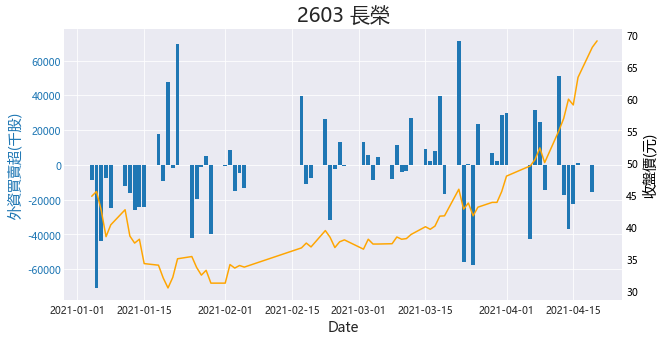

In [14]:
# 調整畫圖模組
plt.style.use('seaborn-darkgrid')
# 調整字體
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
# 可自行輸入股票代號
stock =input()
title = stock+' '+stk['證券名稱'][stk['證券碼']==stock].to_list()[0]
fig, FI1 = plt.subplots(figsize=(10,5))
plt.title(title,{'fontsize' : 20})
plt.xlabel('Date', fontsize=14)
price = FI1.twinx()
# 設定買賣超金額
FI1.set_ylabel('外資買賣超(千股)',color='tab:blue', fontsize=14)
FI1.bar(x=buyover['日期'][buyover['證券碼']==stock]
        ,height=buyover['外資買賣超(千股)'][buyover['證券碼']==stock]
        ,width = 0.8)
FI1.tick_params(axis='y',labelcolor = 'tab:blue')
# 設定收盤價
price.set_ylabel('收盤價(元)'
                 ,color='black'
                 ,fontsize=14)
price.plot(stock_price['日期'][stock_price['證券碼']==stock]
           ,stock_price['收盤價'][stock_price['證券碼']==stock]
           ,color='orange'
           ,alpha=3)
#plt.xticks(rotation=45)
price.tick_params(axis='y',labelcolor = 'black')
# 取消 price的 grid
price.grid(False)

## 包裝成函數

In [15]:
def create_plot():
    # 調整畫圖模組
    plt.style.use('seaborn-darkgrid')
    # 調整字體
    plt.rcParams['font.sans-serif']=['Microsoft YaHei']
    # 可自行輸入股票代號
    stock =input()
    title = stock+' '+stk['證券名稱'][stk['證券碼']==stock].to_list()[0]
    fig, FI1 = plt.subplots(figsize=(10,5))
    plt.title(title,{'fontsize' : 20})
    plt.xlabel('Date', fontsize=14)
    price = FI1.twinx()
    # 設定買賣超金額
    FI1.set_ylabel('外資買賣超(千股)',color='tab:blue', fontsize=14)
    FI1.bar(x=buyover['日期'][buyover['證券碼']==stock]
            ,height=buyover['外資買賣超(千股)'][buyover['證券碼']==stock]
            ,width = 0.8)
    FI1.tick_params(axis='y',labelcolor = 'tab:blue')
    # 設定收盤價
    price.set_ylabel('收盤價(元)'
                     ,color='black'
                     ,fontsize=14)
    price.plot(stock_price['日期'][stock_price['證券碼']==stock]
               ,stock_price['收盤價'][stock_price['證券碼']==stock]
               ,color='orange'
               ,alpha=3)
    #plt.xticks(rotation=45)
    price.tick_params(axis='y',labelcolor = 'black')
    # 取消 price的 grid
    price.grid(False)

## 買賣超/股價圖
### 多股

2891
2303
2888
2887
2884


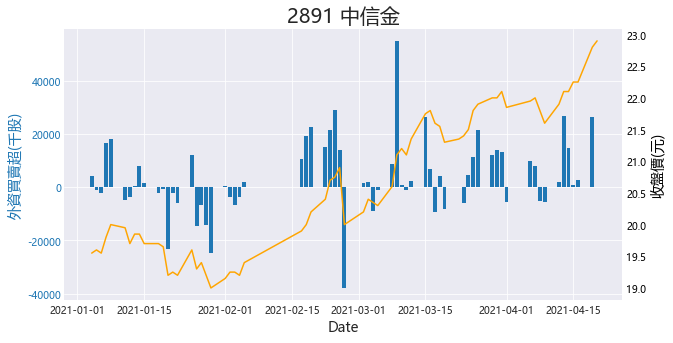

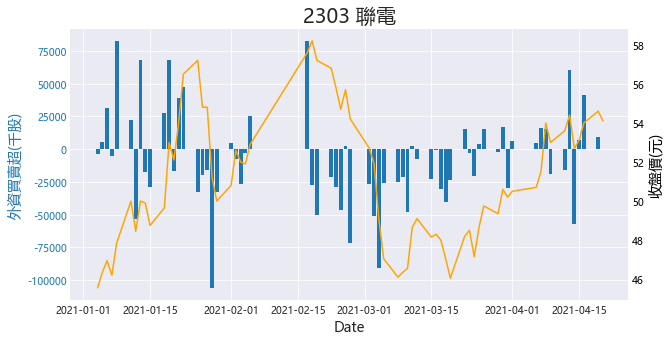

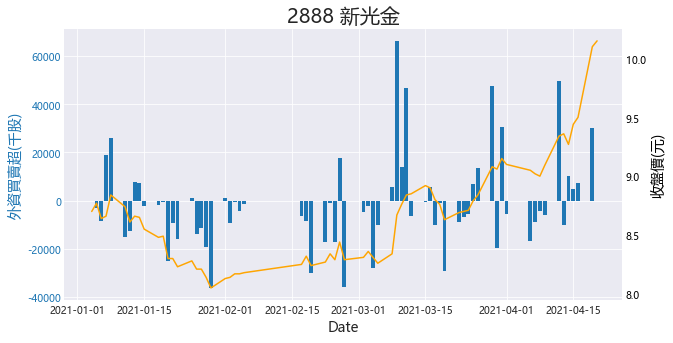

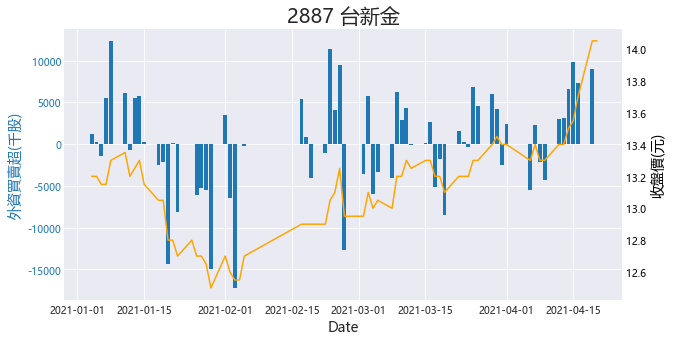

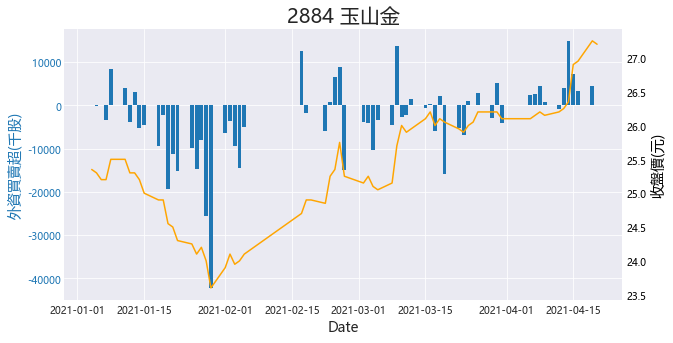

In [16]:
for i in range(5):
    create_plot()